We found the following methods on this website: https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

In [1]:
import numpy as np
import pandas as pd
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [2]:
train = pd.read_csv("traindata.csv").iloc[:,1:]
test = pd.read_csv("testdata.csv").iloc[:,1:]

In [3]:
train1 = pd.get_dummies(train,drop_first=True,columns=['Sex','Race', 'Insurance', 'SEER.Registry', 'Subsite', 'AJCC.7.Stage', 'Chemotherapy', 'follow'])

In [4]:
test1 = pd.get_dummies(test,drop_first=True,columns=['Sex','Race', 'Insurance', 'SEER.Registry', 'Subsite', 'AJCC.7.Stage', 'Chemotherapy', 'follow'])

In [5]:
X = train1.iloc[:,:-1]
y = train1['follow_1']

In [6]:
test_X = test1.iloc[:,:-1]
test_y = test1['follow_1']

In [7]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [8]:
def getResult(mod):
    fit = mod.fit(X,y)
    pred = mod.predict(test_X)
    scores = cross_val_score(mod, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('Mean ROC AUC: %.3f' %mean(scores))
    print('F1-score: %.3f' %f1_score(test_y, pred))
    print('MCC: %.3f' %matthews_corrcoef(test_y, pred))
    mat = confusion_matrix(pred, test_y)
    mat
    sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
    plt.xlabel("Actual Result")
    plt.ylabel("Predicted Result")
    a, b = plt.ylim() 
    a += 0.5 
    b -= 0.5 
    plt.ylim(a, b)
    plt.show() 

# Bagging for Imbalanced Classification

### Standard Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier

Mean ROC AUC: 0.800
F1-score: 0.968
MCC: 0.578


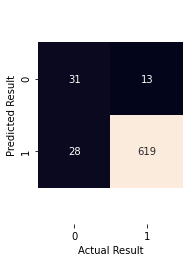

CPU times: user 241 ms, sys: 86.3 ms, total: 327 ms
Wall time: 4.69 s


In [10]:
%%time
getResult(BaggingClassifier())

### Bagging With Random Undersampling

In [11]:
from imblearn.ensemble import BalancedBaggingClassifier

Mean ROC AUC: 0.834
F1-score: 0.888
MCC: 0.374


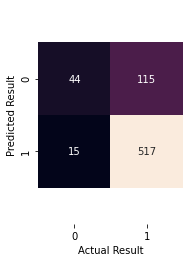

CPU times: user 169 ms, sys: 17.3 ms, total: 186 ms
Wall time: 801 ms


In [12]:
%%time
getResult(BalancedBaggingClassifier())

# Random Forest for Imbalanced Classification

### Standard Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

Mean ROC AUC: 0.802
F1-score: 0.973
MCC: 0.623


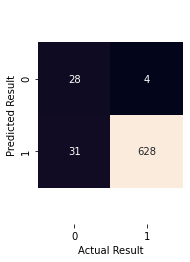

CPU times: user 143 ms, sys: 14.9 ms, total: 158 ms
Wall time: 470 ms


In [14]:
%%time
getResult(RandomForestClassifier(n_estimators=10))

### Random Forest With Class Weighting

Mean ROC AUC: 0.787
F1-score: 0.974
MCC: 0.633


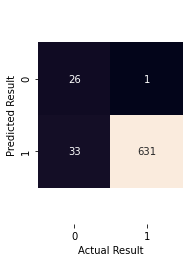

CPU times: user 211 ms, sys: 21.3 ms, total: 232 ms
Wall time: 517 ms


In [15]:
%%time
getResult(RandomForestClassifier(n_estimators=10, class_weight='balanced'))

### Random Forest With Bootstrap Class Weighting

Mean ROC AUC: 0.789
F1-score: 0.976
MCC: 0.673


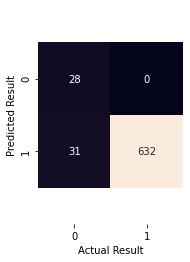

CPU times: user 152 ms, sys: 14.2 ms, total: 166 ms
Wall time: 526 ms


In [16]:
%%time
getResult(RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample'))

### Random Forest With Random Undersampling

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier

Mean ROC AUC: 0.809
F1-score: 0.844
MCC: 0.312


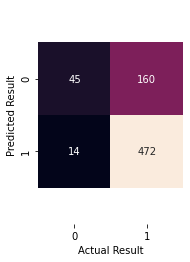

CPU times: user 149 ms, sys: 14 ms, total: 163 ms
Wall time: 685 ms


In [18]:
%%time
getResult(BalancedRandomForestClassifier(n_estimators=10))

# Easy Ensemble for Imbalanced Classification

### Easy Ensemble

In [19]:
from imblearn.ensemble import EasyEnsembleClassifier

Mean ROC AUC: 0.834
F1-score: 0.863
MCC: 0.330


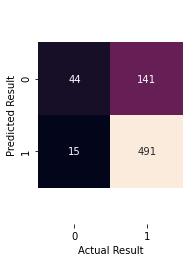

CPU times: user 886 ms, sys: 26.7 ms, total: 913 ms
Wall time: 10.1 s


In [20]:
%%time
getResult(EasyEnsembleClassifier(n_estimators=10))